In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# 1. Data Exploration and Cleaning

In [2]:
df = pd.read_csv('HR-Employee-Attrition.csv')
df.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
453,26,Yes,Travel_Frequently,426,Human Resources,17,4,Life Sciences,1,608,...,2,80,1,8,2,2,7,7,1,0
1246,30,Yes,Travel_Frequently,600,Human Resources,8,3,Human Resources,1,1747,...,3,80,1,6,0,2,4,2,1,2
1188,29,No,Travel_Rarely,991,Sales,5,3,Medical,1,1669,...,2,80,1,10,3,2,10,0,0,9
302,28,No,Travel_Rarely,1476,Research & Development,16,2,Medical,1,412,...,3,80,0,9,2,3,8,3,0,7
495,27,Yes,Travel_Rarely,1420,Sales,2,1,Marketing,1,667,...,2,80,1,5,3,3,4,3,0,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## 1.1 Deleting Unnecessary Columns

Columns that are redundant or lack a clear explanation are deleted from the dataset.

In [4]:
list_of_columns = ['Education', 'EmployeeCount', 'MonthlyRate', 'Over18', 'OverTime', 'StandardHours', 'StockOptionLevel', 'YearsAtCompany']

df.drop(columns=(list_of_columns), inplace=True)

## 1.2 Handling Missing Values

In [5]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

No missing values in the dataset.

## 1.3 Handling Duplicates

In [6]:
df.duplicated().sum()

0

No duplicated data in the dataset.

# 2. Exploratory Data Analysis (EDA)

## 2.1 Univariate Analysis

### a. Numerical Data

In [7]:
# Dividing the data into numerical and categorical
nums = ['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
        'JobSatisfaction', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'TotalWorkingYears',
        'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

cats = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']

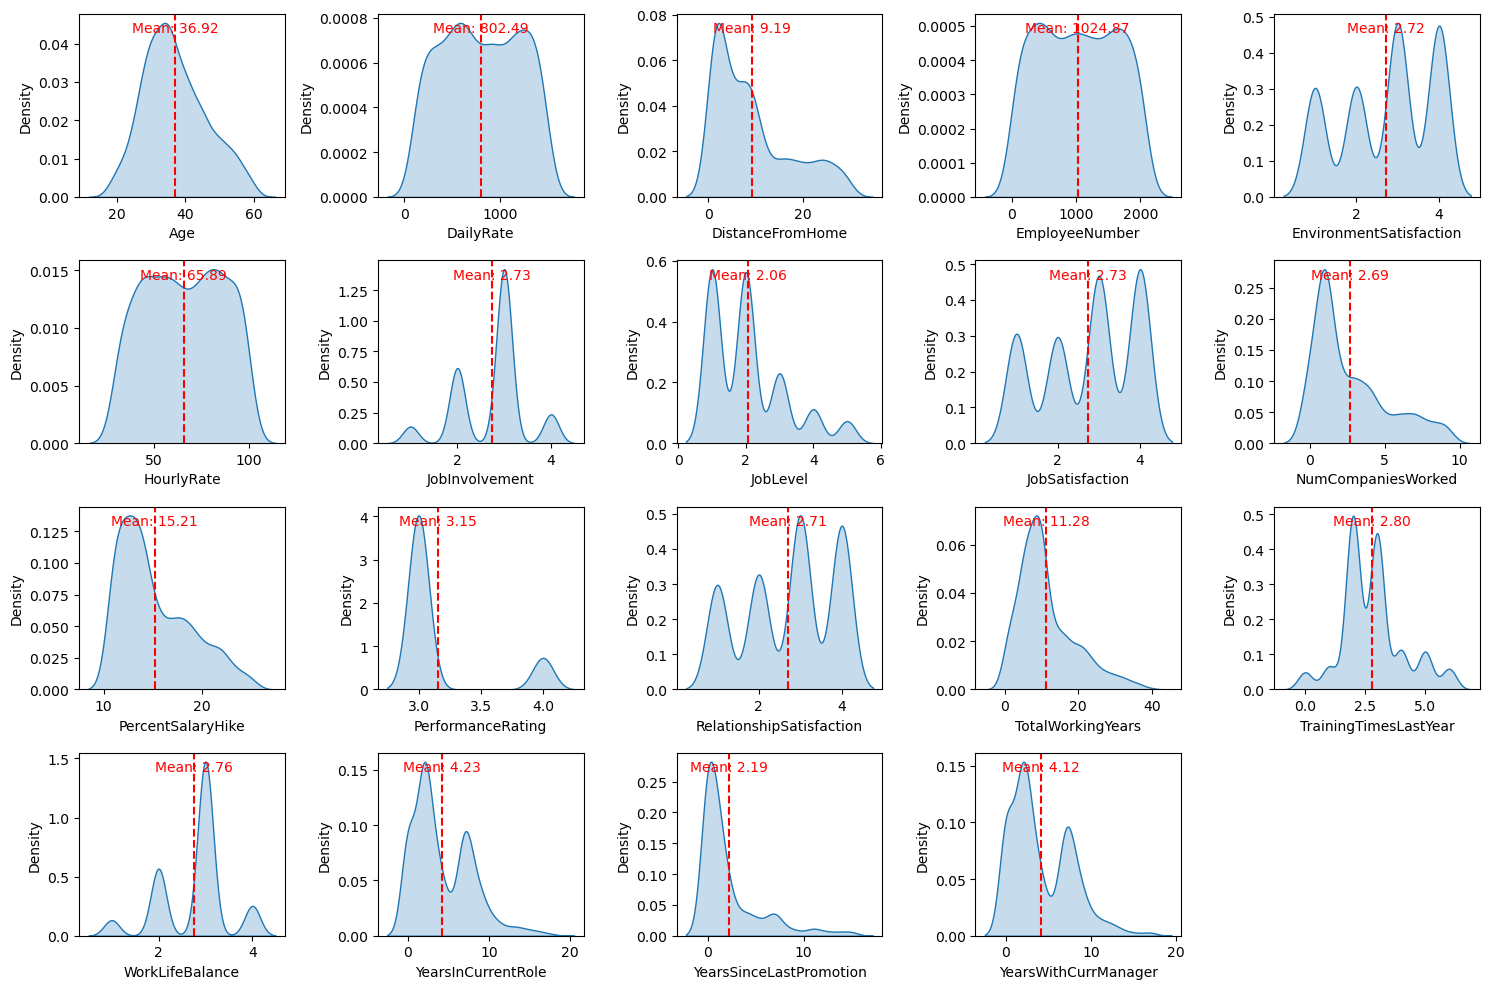

In [8]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(nums):
    plt.subplot(4, 5, 1+i)
    sns.kdeplot(data=df, x=col, fill=True)

    mean_value = df[col].mean()
    
    # Add a vertical line for the mean value
    plt.axvline(mean_value, color='red', linestyle='--')
    
    # Optionally, add a text annotation for the mean value
    plt.text(mean_value, plt.gca().get_ylim()[1] * 0.9, f'Mean: {mean_value:.2f}', color='red', ha='center')

plt.tight_layout()  # Adjust subplots to fit into figure area
plt.show()

The figure above shows the distribution of data in each column, along with their mean values.

### b. Categorical Data

In [9]:
df[cats].sample(5)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
1433,No,Travel_Rarely,Sales,Other,Female,Sales Executive,Divorced
947,Yes,Travel_Rarely,Sales,Life Sciences,Male,Sales Executive,Single
149,No,Travel_Rarely,Research & Development,Medical,Female,Laboratory Technician,Single
972,No,Non-Travel,Research & Development,Life Sciences,Female,Laboratory Technician,Single
1089,No,Travel_Rarely,Research & Development,Medical,Male,Research Scientist,Married


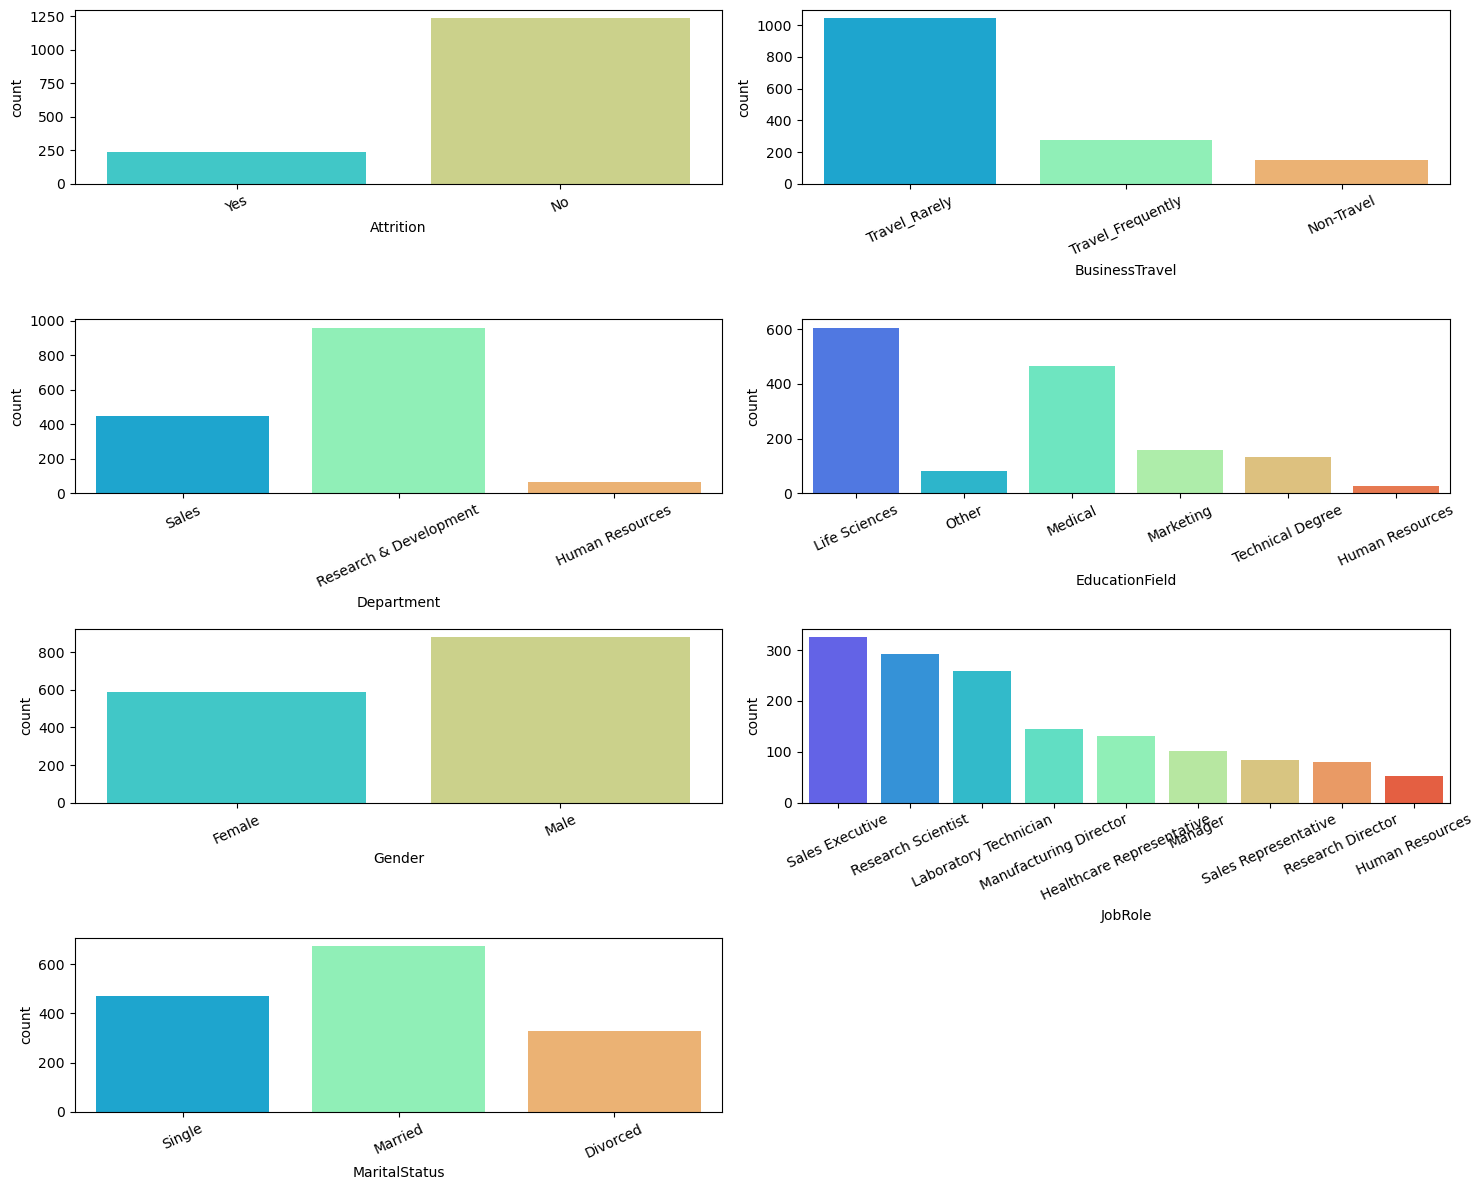

In [10]:
plt.figure(figsize=(15, 12))

for i, col in enumerate(cats):
    plt.subplot(4, 2, 1+i)
    sns.countplot(data=df, x=col, palette='rainbow')
    plt.xticks(rotation=25)

plt.tight_layout()
plt.show()

The plots show the demographics of the employees in the organization:
1. The attrition rate is quite low, but we still want to understand the key factors that cause it.
2. Most employees travel, but rarely.
3. Research and Development is the department with the highest number of employees.
4. The majority of employees have an educational background in the Life Sciences field.
5. Male employees slightly outnumber female employees.
6. Sales Executive is the most common role.
7. Most employees are married.

## 2.2 Bivariate Analysis

### a. Numerical Data vs. Attrition

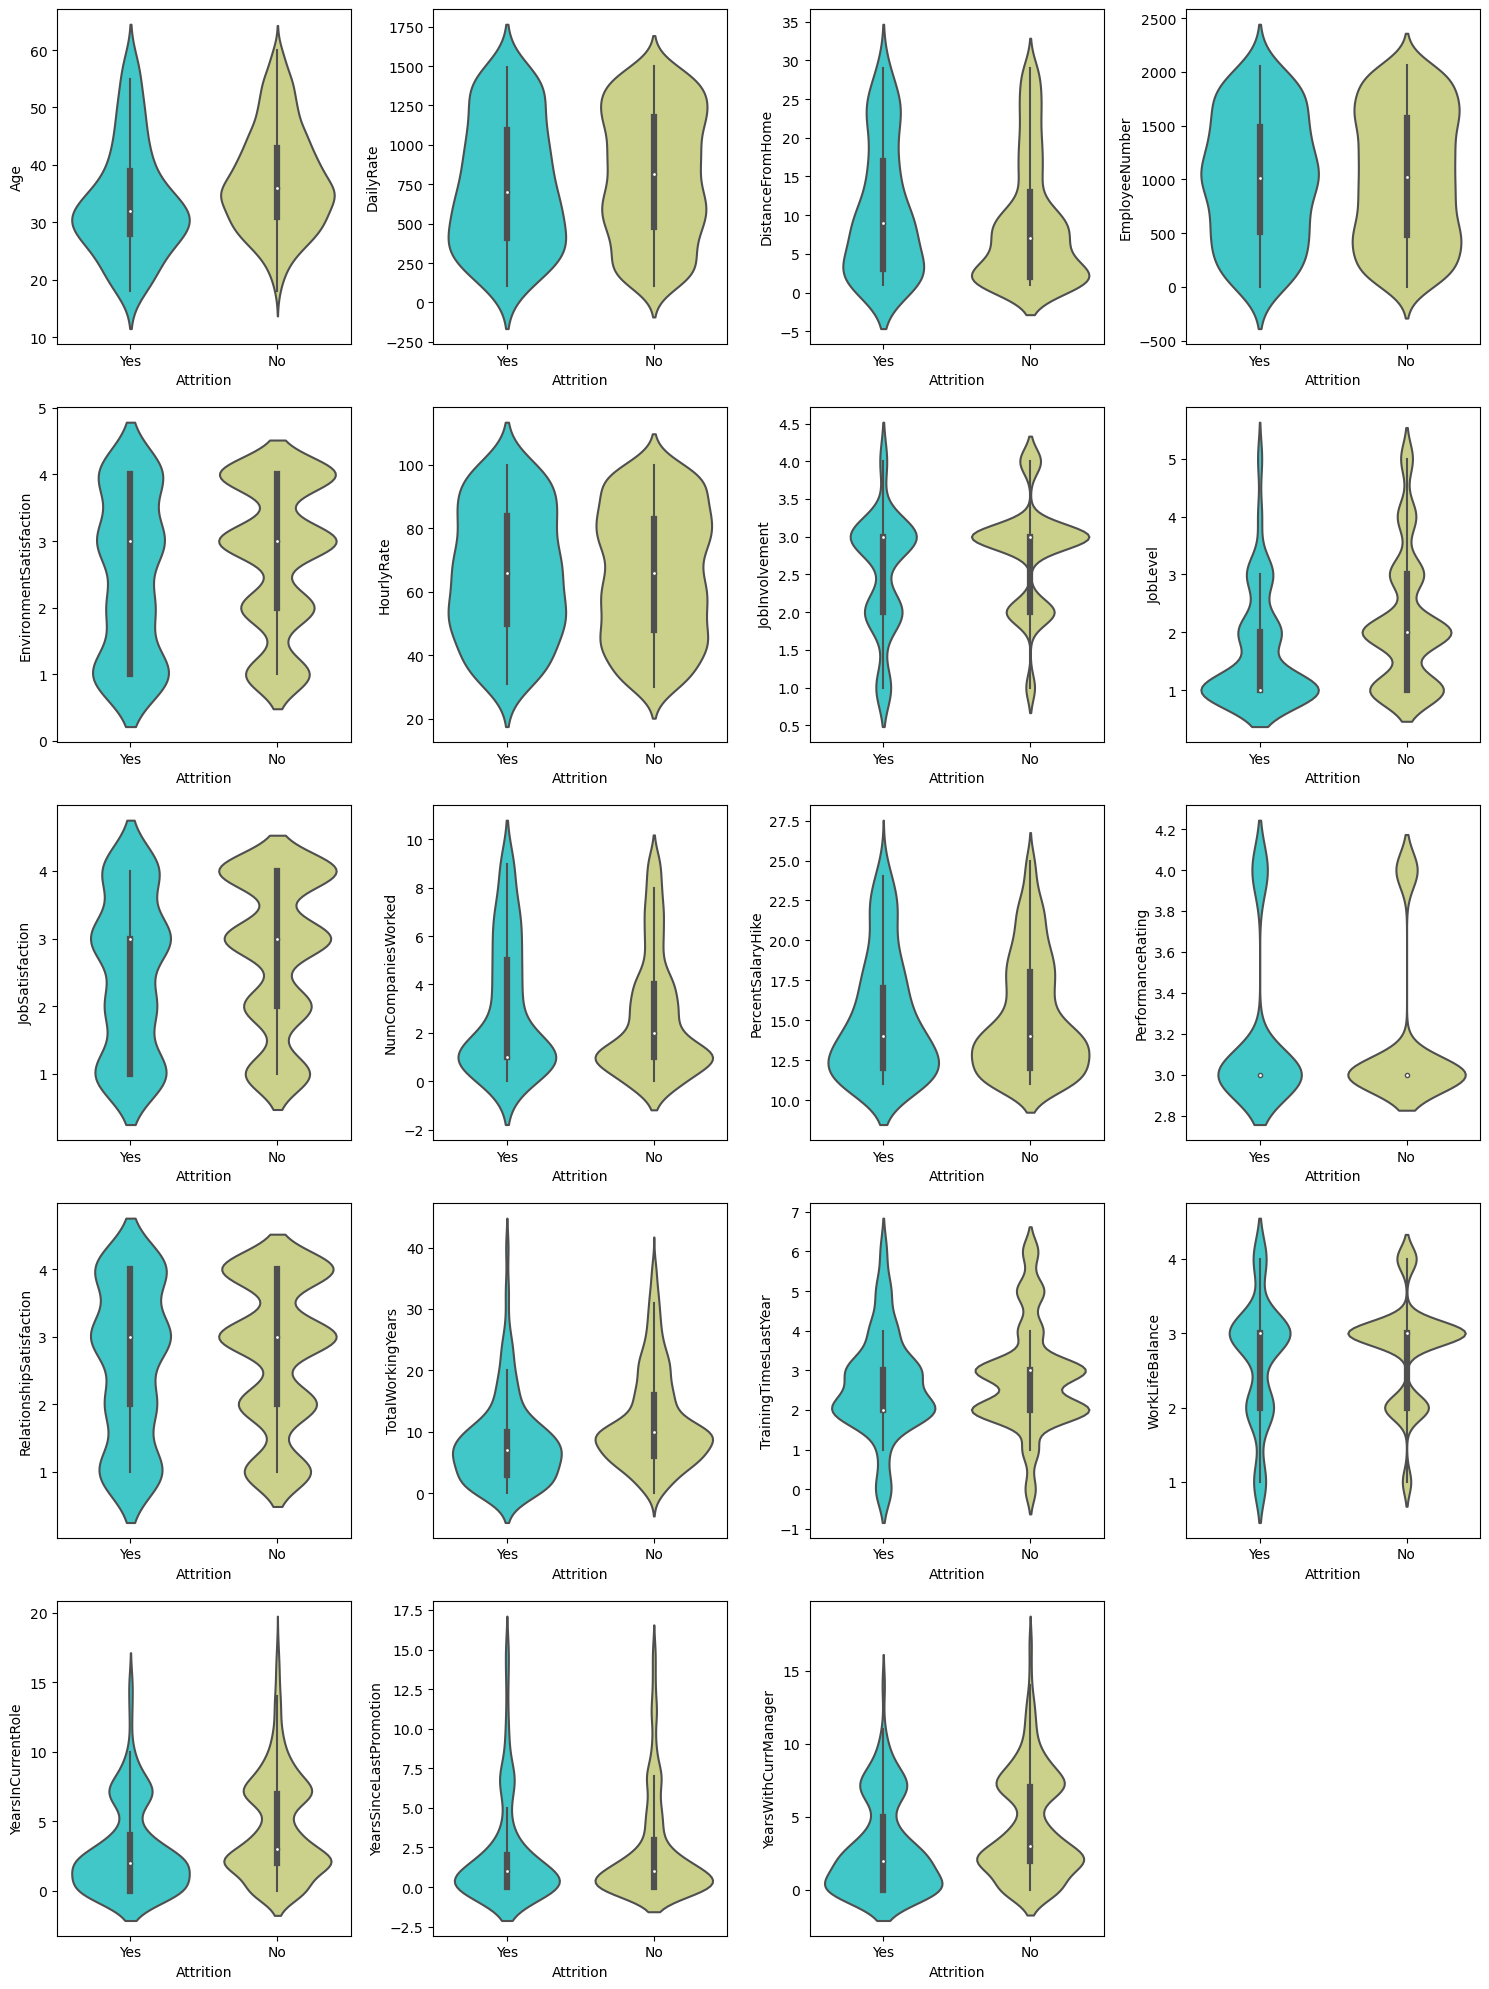

In [11]:
plt.figure(figsize=(15, 20))

for i, col in enumerate(nums):
    plt.subplot(5, 4, i+1)
    sns.violinplot(data=df, x='Attrition', y=col, palette='rainbow')

plt.tight_layout()
plt.show()

The insighs that can be gained from the visualization are:
1. Attrition mostly occurs among employees in their mid-twenties to mid-thirties.
2. Attrition is more common among employees with a lower daily rate.
2. Attrition is prevalent among amployees with an Environment Satisfaction Score below 2.
3. Attrition mostly happens to employees with a lower job level (below 2). 

These columns are indicated to have a correlation with attrition. Beyond these findings, we cannot draw definitive conclusions. 

For instance, we cannot assert that most attrition happens to employees with lower total years with their current manager, because the data shows that many employees who remain also have lower total years with their current manager. This just reflects the employee demographics within the company.

### b. Categorical Data vs. Attrition

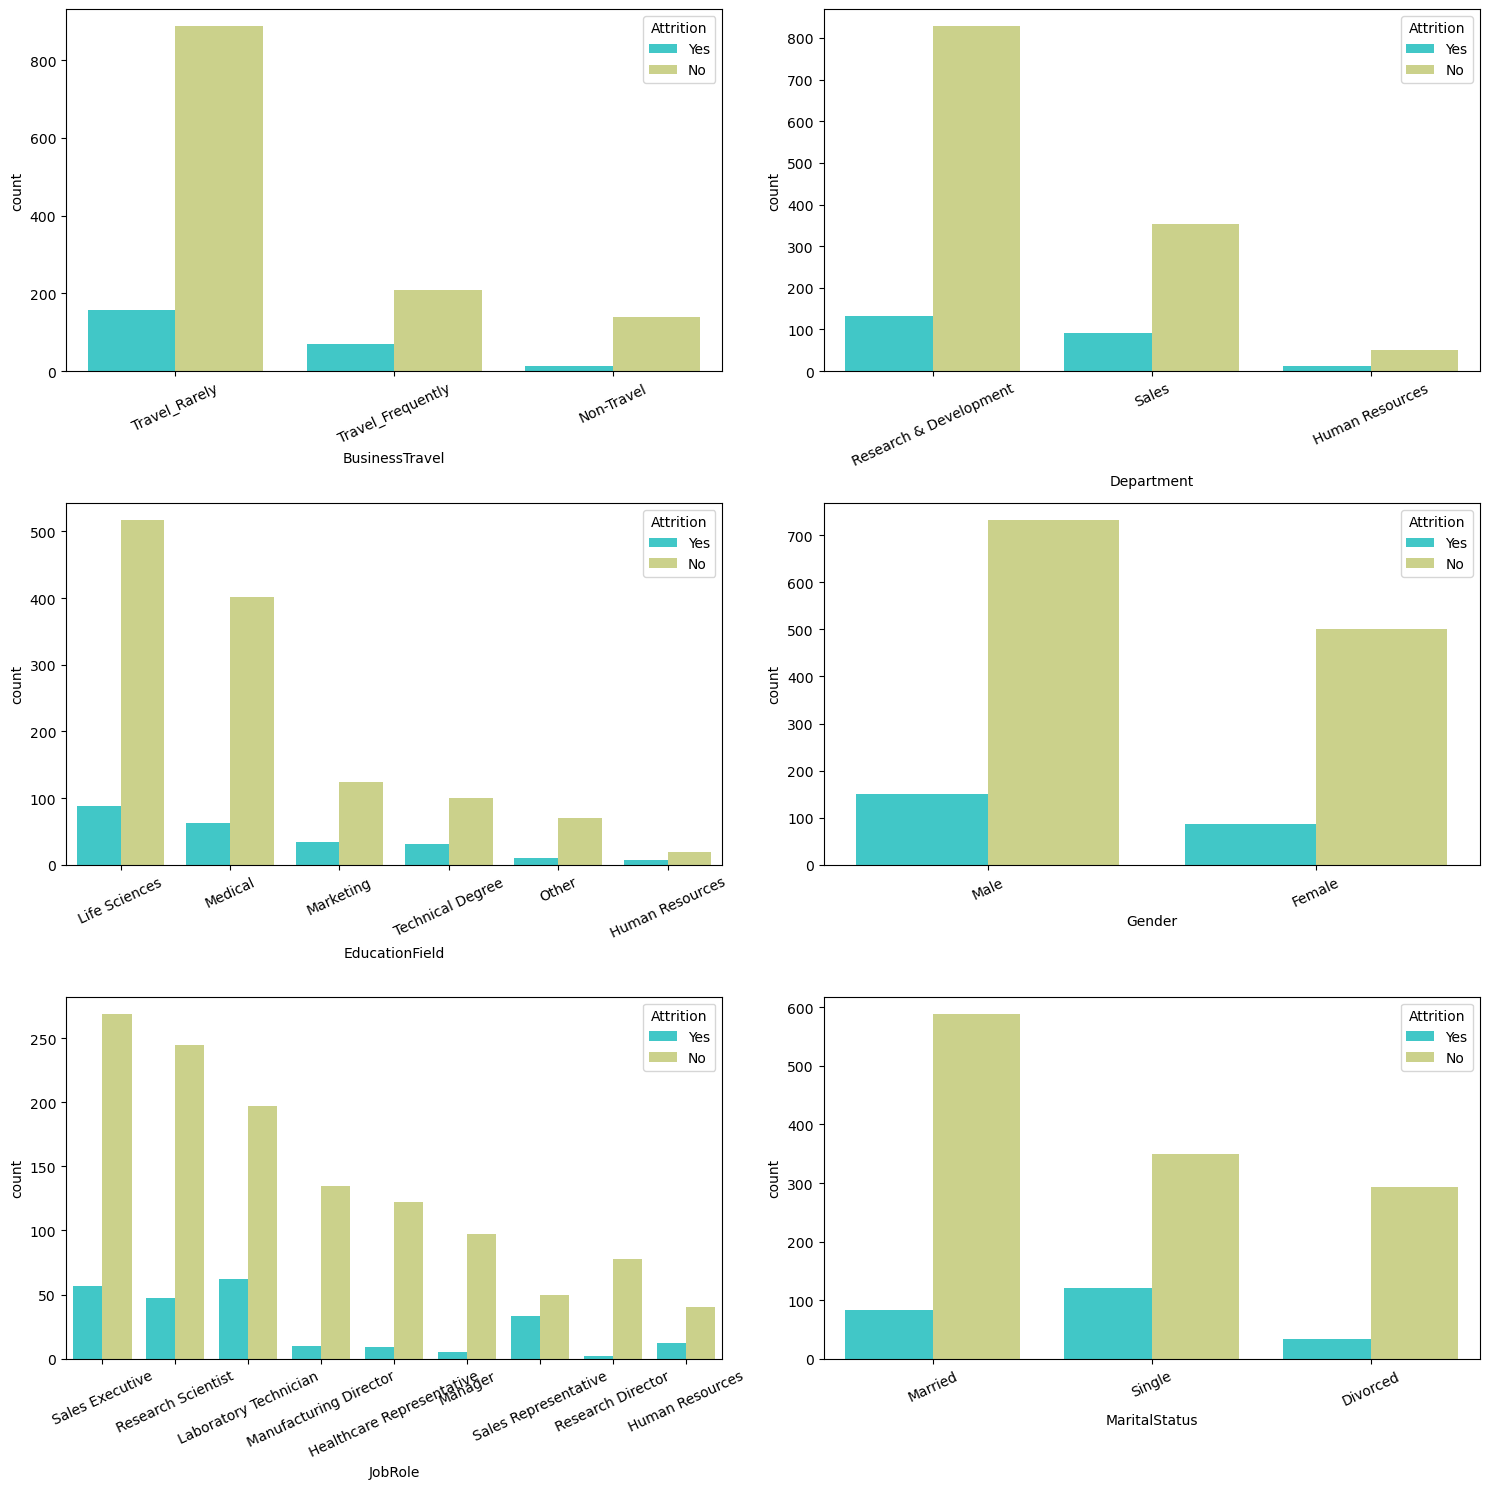

In [12]:
# Deleting 'Attrition' from categorical column list
cats.remove('Attrition')

plt.figure(figsize=(15,15))

for i, col in enumerate(cats):
    plt.subplot(3, 2, 1+i)
    sorted_order = df[col].value_counts().index
    sns.countplot(data=df, x=col, hue='Attrition', order=sorted_order, palette='rainbow')
    plt.xticks(rotation=25)

plt.tight_layout()
plt.show()

The insight that can be gained are:
1. Attrition is more common among employees in the Research Scientist role.
2. Attrition mostly happens to employees who are single.

## 2.3 Multivariate Analysis

The first thing we do in this step is to convert certain categorical data into numerical data.

In [13]:
# Change Attrition data type
import numpy as np

df_copy = df.copy()
df_copy['Attrition'] = np.where(df_copy['Attrition']=='Yes', 1, 0)


In [14]:
# Change Job Role and Marital Status column into numerical using OneHotEncoding
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding to the Jobe Role and Marital Status column
column_list = ['JobRole', 'MaritalStatus']
one_hot_encoded = encoder.fit_transform(df_copy[column_list])

# Create a dataframe with the one-hot encoded columns
# Using get_feature_names_out() to get the column names
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(column_list))

# Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded = pd.concat([df_copy, one_hot_df], axis=1)

one_hot_df.sample(5)

,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
1088,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1010,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
190,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
942,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [15]:
# Move Attrition to the end
df_encoded['Attrition'] = df_encoded.pop('Attrition')

# Extract numerical column's names from df_encoded
numerical_columns = df_encoded.select_dtypes(include=['int32', 'int64', 'float64']).columns.tolist()

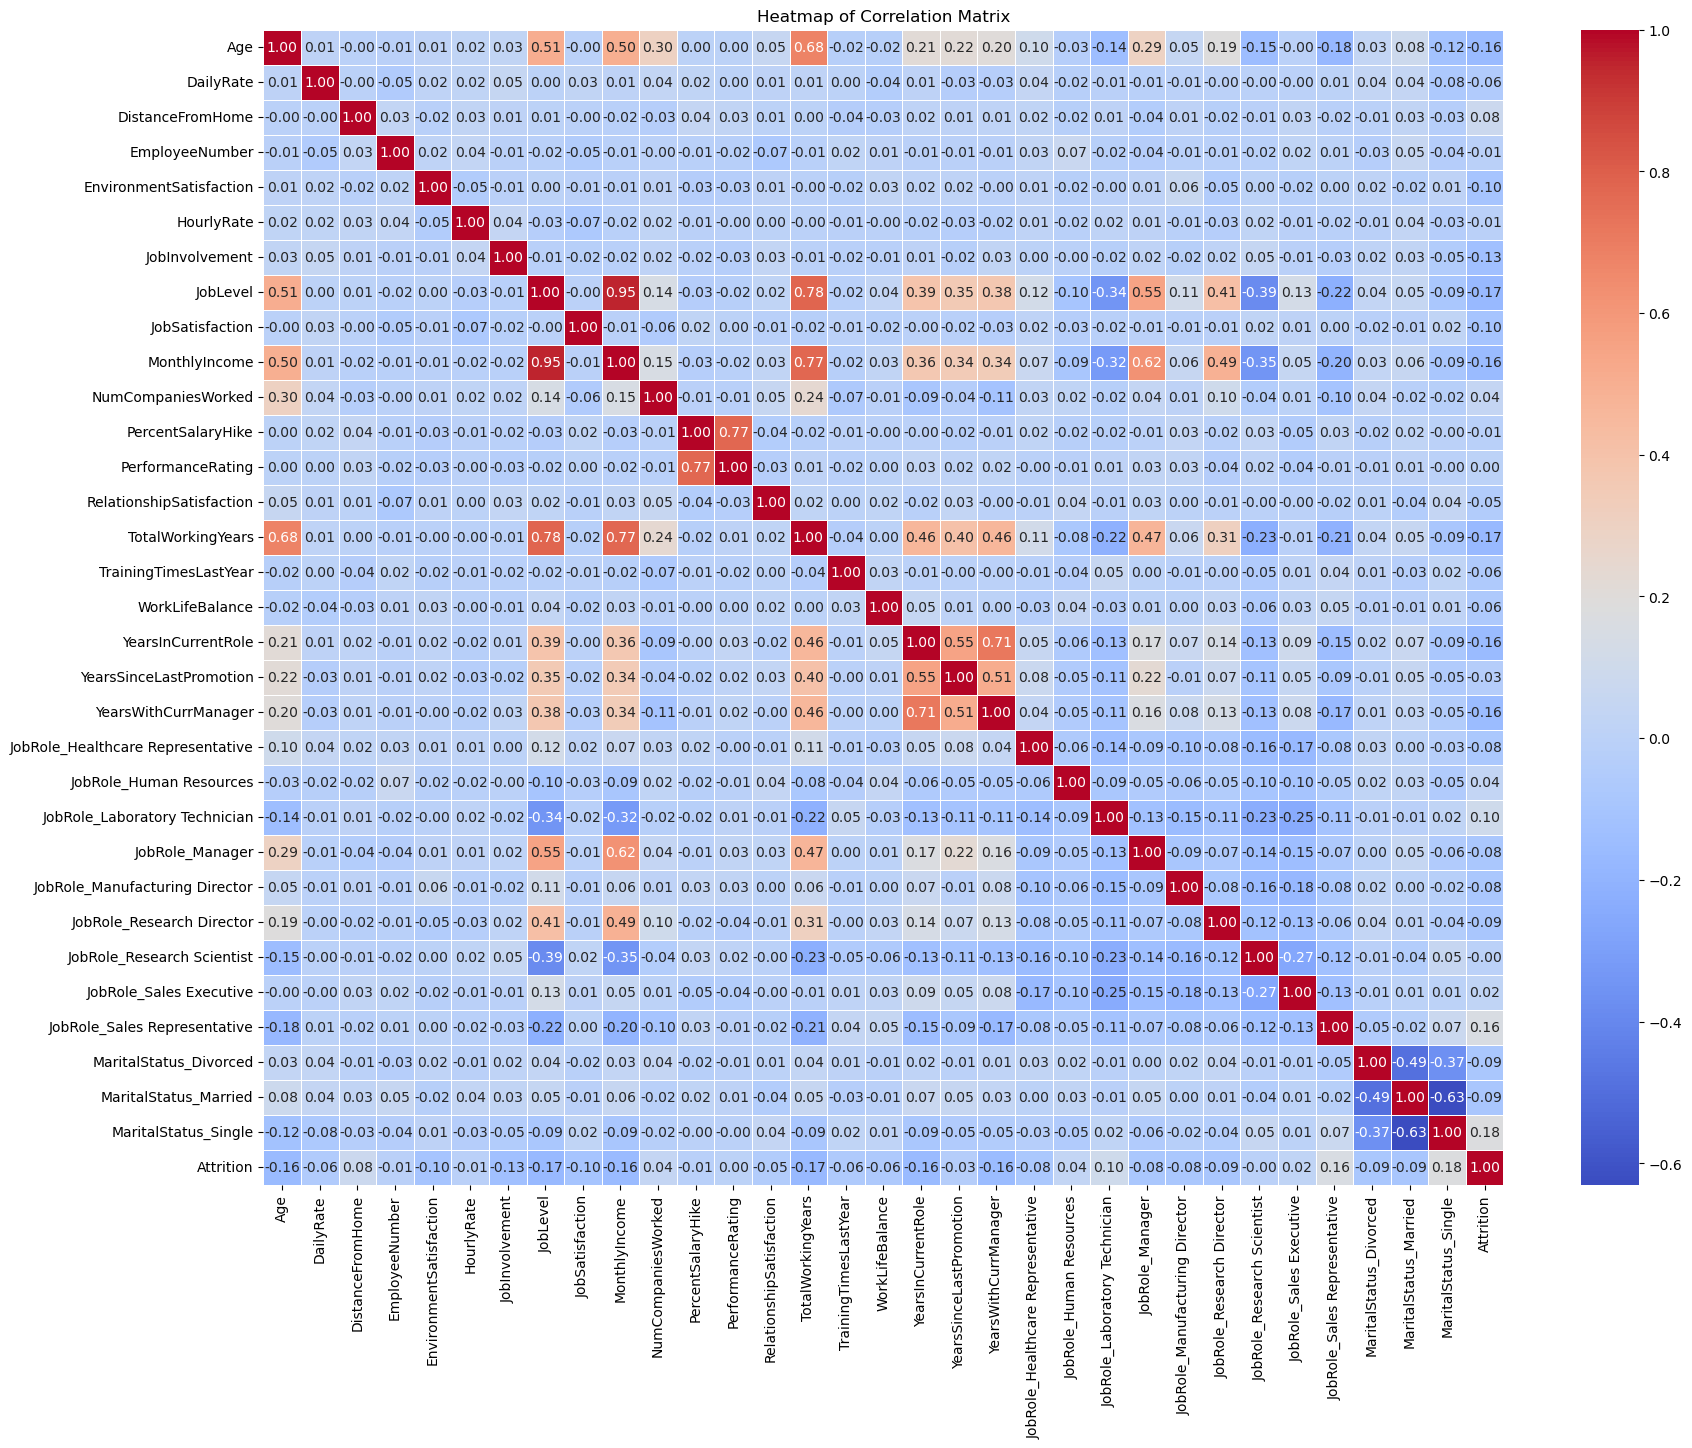

In [16]:
data = df_encoded[numerical_columns]

plt.figure(figsize=(20, 15))
sns.heatmap(data.corr(), fmt='.2f', annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Heatmap of Correlation Matrix')
plt.show()

Interpretation of Correlation with Attrition:
1. **Age and Attrition**: Weak negative correlation (16%) </br>
Younger employees are slightly more likely to leave the company compared to older employees. 

2. **Job Involvement and Attrition**: Weak negative correlation (13%) </br>
Employees with lower job involvement tend to leave the company.
3. **Job Level and Attrition**: Weak negative correlation (17%) </br>
Employees in lower-level jobs are more likely to leave the company than those in higher-level positions.
4. **Monthly Income and Attrition**: Weak negative correlation (16%) </br>
Employees with lower monthly incomes are more likely to leave the company.
5. **Total Working Years and Attrition**: Weak negative correlation (17%) </br>
Employees with fewer total working years are more likely to leave the company. 
6. **Years in Current Role and Attrition**: Weak negative correlation (16%) </br>
Employees with fewer years in their current role are slightly more likely to leave the company.
7. **Years with Current Manager and Attrition**: Weak negative correlation (16%) </br>
Employees with fewer years under their current manager are slightly more likely to leave the company.
8. **Sales Representative Role and Attrition**: Weak positive correlation (16%) </br>
Employees in the Sales Representative role are slightly more likely to leave the company.
9. **Single Status and Attrition**: Weak positive correlation (18%) </br>
Employees who are single are slightly more likely to leave the company.

# 3. Data Preparation

## 3.1 Class Imbalance

In [17]:
df_encoded['Attrition'].value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

The classes in our dataset are highly imbalance, with significantly more instances of no attrition (0) compared to attrition (1). To address this imbalance, we will use oversampling techniques.

In [18]:
# Split the data
X = df_encoded.drop('Attrition', axis=1)
y = df_encoded['Attrition']

# Use oversampling to handle the imbalance
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=42)
X, y = oversampler.fit_resample(X, y)

# Recombine the data
df_encoded = pd.concat([X, y], axis=1)
df_encoded['Attrition'].value_counts()

Attrition
1    1233
0    1233
Name: count, dtype: int64

The class in now balanced.

## 3.2 Feature Selection

To decrease the dimensionality of the table, we select only those columns that exhibit a correlation not less than 10% with the target variable, Attrition. And we ensure that these selected columns do not exhibit multicollinearity with each other. 

In [19]:
selected_columns = ['Age', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 
                    'YearsInCurrentRole', 'YearsWithCurrManager', 'JobRole_Laboratory Technician', 'JobRole_Sales Representative', 
                    'MaritalStatus_Single', 'Attrition']

df_modeling = df_encoded[selected_columns]

# 4. Data Modeling

## 4.1 Split Data (Train and Test)

In [20]:
X = df_modeling.drop(columns=['Attrition'])
y = df_modeling[['Attrition']]

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 4.2 Evaluation Method

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate, StratifiedKFold


def eval_classification(model, X_train, X_test, y_train, y_test, n_splits=5):
    # Evaluate on the test set
    y_pred_test = model.predict(X_test)

    # StratifiedKFold for cross-validation with stratified sampling
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    # Perform cross-validation
    cv_test_results = cross_validate(model, X_test, y_test, scoring=['roc_auc'],
                                     cv=cv, return_train_score=False)
    cv_train_results = cross_validate(model, X_train, y_train, scoring=['roc_auc'],
                                      cv=cv, return_train_score=False)

    # Display metrics for the training set
    print("Metrics for the Test Set:")
    print("Accuracy: %.2f" % accuracy_score(y_test, y_pred_test))
    print("Precision: %.2f" % precision_score(y_test, y_pred_test))
    print("Recall: %.2f" % recall_score(y_test, y_pred_test))
    print("F1-Score: %.2f" % f1_score(y_test, y_pred_test))
    print()

    # Display cross-validation results
    print("Metrics Using Cross Validation:")
    print(f"Mean ROC-AUC (Test): {cv_test_results['test_roc_auc'].mean():.2f}")
    print(f"Std ROC-AUC (Test): {cv_test_results['test_roc_auc'].std():.2f}")
    print()
    print(f"Mean ROC-AUC (Train): {cv_train_results['test_roc_auc'].mean():.2f}")
    print(f"Std ROC-AUC (Train): {cv_train_results['test_roc_auc'].std():.2f}")

## 4.3 Model

### a. Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=10000, random_state=42)

lr.fit(X_train, y_train)

eval_classification(lr, X_train, X_test, y_train, y_test)

Metrics for the Test Set:
Accuracy: 0.64
Precision: 0.66
Recall: 0.61
F1-Score: 0.63

Metrics Using Cross Validation:
Mean ROC-AUC (Test): 0.68
Std ROC-AUC (Test): 0.04

Mean ROC-AUC (Train): 0.74
Std ROC-AUC (Train): 0.03


### b. AdaBoost

In [22]:
from sklearn.ensemble import AdaBoostClassifier
# Initialize AdaBoost Classifier
clf = AdaBoostClassifier()

# Train the classifier
clf.fit(X_train, y_train)

# Make prediction and evaluate the model
eval_classification(clf, X_train, X_test, y_train, y_test)

Metrics for the Test Set:
Accuracy: 0.71
Precision: 0.71
Recall: 0.71
F1-Score: 0.71

Metrics Using Cross Validation:
Mean ROC-AUC (Test): 0.77
Std ROC-AUC (Test): 0.04

Mean ROC-AUC (Train): 0.82
Std ROC-AUC (Train): 0.02


### c. Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

eval_classification(rf, X_train, X_test, y_train, y_test)

Metrics for the Test Set:
Accuracy: 0.96
Precision: 0.94
Recall: 0.98
F1-Score: 0.96

Metrics Using Cross Validation:
Mean ROC-AUC (Test): 0.92
Std ROC-AUC (Test): 0.01

Mean ROC-AUC (Train): 0.98
Std ROC-AUC (Train): 0.01


In [6]:
# Model comparison
print('Logistic Regression: \n Accuracy: 0.64\n Precision: 0.66\n Recall: 0.61\n F1-Score: 0.63')
print()
print('AdaBoost: \n Accuracy: 0.71\n Precision: 0.71\n Recall: 0.71\n F1-Score: 0.71')
print()
print('Random Forest: \n Accuracy: 0.96\n Precision: 0.94\n Recall: 0.98\n F1-Score: 0.96')

Logistic Regression: 
 Accuracy: 0.64
 Precision: 0.66
 Recall: 0.61
 F1-Score: 0.63

AdaBoost: 
 Accuracy: 0.71
 Precision: 0.71
 Recall: 0.71
 F1-Score: 0.71

Random Forest: 
 Accuracy: 0.96
 Precision: 0.94
 Recall: 0.98
 F1-Score: 0.96


Among the three algorithms tested, Random Forest achieved the highest accuracy at 96%. Therefore, we will use this algorithm for our data modeling.

## 4.4 Feature Importance

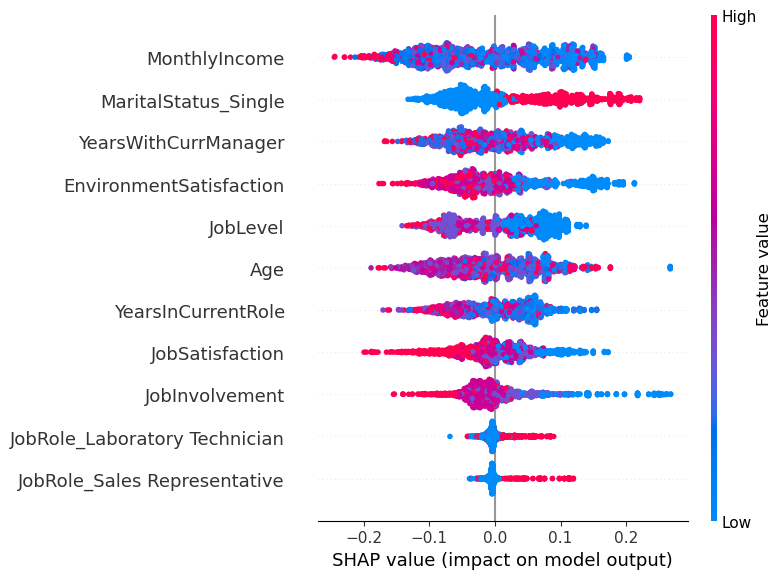

In [27]:
 # Import SHAP and extract the feature names
import shap
feature_names = df_modeling.columns.tolist()

# Create a SHAP explainer and calculate the SHAP values
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_train)

# Plot summary plot
shap.summary_plot(shap_values[1], X_train, feature_names=feature_names)

The features above are features that have a significant impact to employee attrition. The interpretations are as follows:
1. Employees with lower monthly income tend to leave the company.
2. Single employees are more likely to leave the company.
3. Employees with lower total years with current manager tend to leave the company.
4. Employees with lower environment satisfaction tend to leave the company.
5. Employees with lower job level tend to leave the company.